In [1]:
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

stopwords.words('english')
nltk.download('stopwords')
word_tokenize("example")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

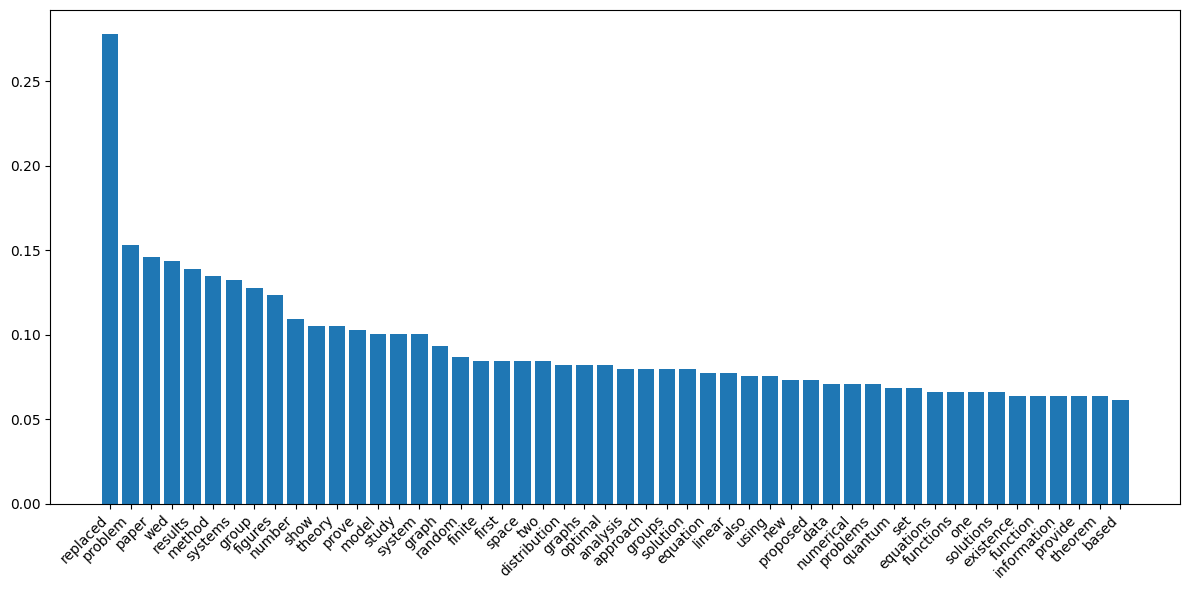

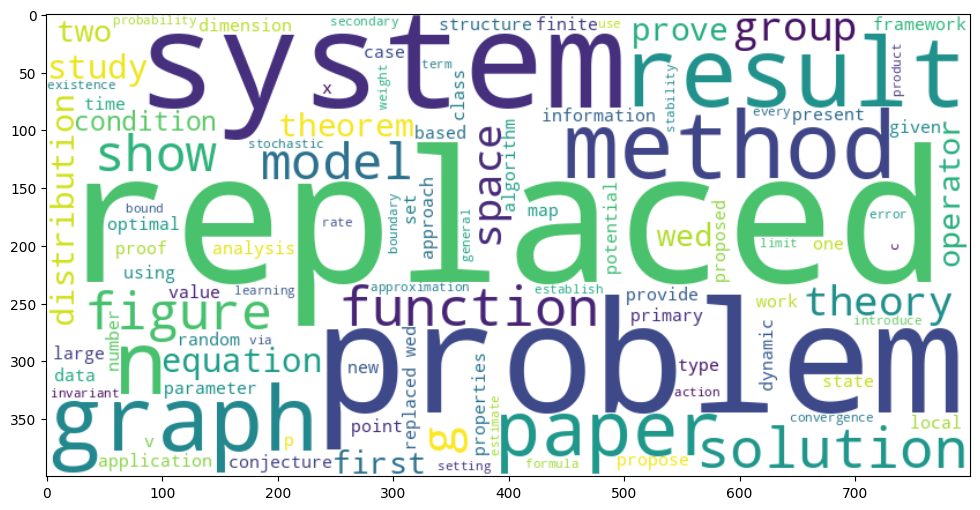

In [2]:
with open('202505090639.txt', 'r', encoding='utf-8') as f:
  text = f.read()

text = text.lower()

text = text.replace("2025", '')
text = text.replace("may", '')
text = text.replace("categories", '')
text = text.replace("authors", '')
text = text.replace("http", '')
text = text.replace("gmt", '')
text = text.replace("title", '')
text = text.replace("thu", '')
text = text.replace("comments", '')
text = text.replace("date", '')
text = text.replace("version", '')
text = text.replace("pages", '')
text = text.replace("revised", '')

tokens = word_tokenize(text.lower())

stop_words = set(stopwords.words('english'))
words = [word for word in tokens if word.isalnum() and word not in stop_words]
processed_text = " ".join(words)

vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform([processed_text])

feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()[0]

word_tfidf = dict(zip(feature_names, tfidf_scores))

sorted_word_tfidf = sorted(word_tfidf.items(), key=lambda item: item[1], reverse=True)

top_n = 50
top_words = sorted_word_tfidf[:top_n]

words_to_plot = [word for word, score in top_words]
tfidf_values = [score for word, score in top_words]

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='viridis').generate(processed_text)

plt.figure(figsize=(12, 6))
plt.bar(words_to_plot, tfidf_values)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()